# Nucleotide diversity across alphatectiviruses

In [1]:
import pandas as pd
import dna_features_viewer as dfv
from Bio import SeqIO
import bioframe as bf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.cm as cm
import seaborn.objects as so

## Read nucleotide diversity data

In [2]:
# read 100-slidingwindow
df_nucdiv100s = pd.read_csv('../data/NucDiv/NucDiv.100bp.slideby1.windowed.pi', sep='\t')

df_nucdiv100s.columns = ['chrom', 'start', 'end', 'nvars', 'nuc_div']
df_nucdiv100s['mid_coord'] = (df_nucdiv100s['end'] + df_nucdiv100s['start'])/2
df_nucdiv100s = df_nucdiv100s[['chrom', 'start', 'end', 'mid_coord', 'nuc_div']]

df_nucdiv100s.head()

,chrom,start,end,mid_coord,nuc_div
0,NC_001421.2,1,100,50.5,0.023981
1,NC_001421.2,2,101,51.5,0.023981
2,NC_001421.2,3,102,52.5,0.023981
3,NC_001421.2,4,103,53.5,0.023981
4,NC_001421.2,5,104,54.5,0.023981


## Read genbank file

In [3]:
ref_gb = '../../../../genomes/data/reference/genomes/PRD1.gb'

# dna features viewer parser
dfv.BiopythonTranslator.ignored_features_types = ['source', 'product', 'gene']
graphic_record = dfv.BiopythonTranslator().translate_record(SeqIO.read(ref_gb, "genbank"))

## Plot

In [4]:
graphic_record.feature_level_height = 0

In [12]:
# map colors to values for heatmap
norm = matplotlib.colors.Normalize(vmin=df_nucdiv100s['nuc_div'].min(),
                                   vmax=df_nucdiv100s['nuc_div'].max(),
                                   clip=True)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=sns.color_palette("RdYlBu_r", as_cmap=True))

hm_dict = {}
for value in sorted(df_nucdiv100s['nuc_div']):
    hm_dict[value] = mapper.to_rgba(value)

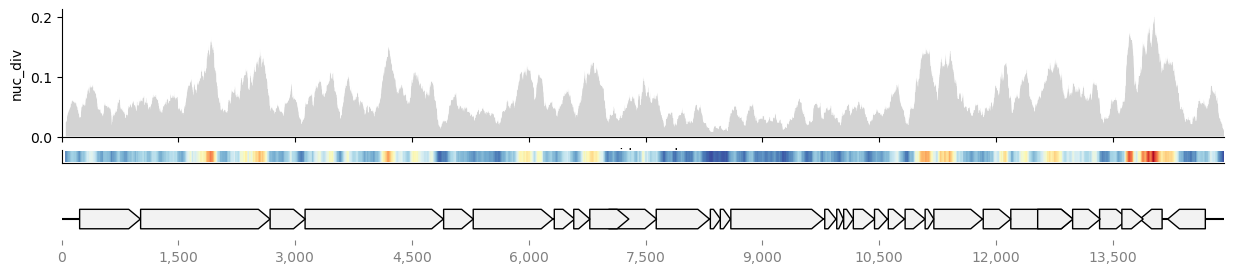

In [13]:
fig, axs = plt.subplots(3, 1,
                        figsize=(15,3),
                        sharex=True,
                        gridspec_kw={'height_ratios': [10, 1, 5]})


graphic_record = dfv.BiopythonTranslator().translate_record(SeqIO.read(ref_gb, "genbank"))
graphic_record.feature_level_height = 0 

for feature in graphic_record.features:
    feature.color = '#f2f2f2'
    feature.label = None


# bars
(
so.Plot(df_nucdiv100s,
        x='mid_coord',
        y='nuc_div')
.add(so.Line(color='#D3D3D3',
             linewidth=0)).add(so.Area(edgewidth=0,
                                        color='#D3D3D3',
                                        alpha=1))
.on(axs[0])
.plot()
)

# heatmap
axs[1].vlines(x=df_nucdiv100s['mid_coord'],
              ymin=0,
              ymax=1,
              linewidth=.2,
              colors=df_nucdiv100s['nuc_div'].fillna(0).map(hm_dict))


axs[1].get_xaxis().set_visible(False)
axs[1].get_yaxis().set_visible(False)

# gene map
graphic_record.plot(ax=axs[2],
                    with_ruler=True,
                    annotate_inline=True)

sns.despine()
#plt.savefig('../../nucleotide_diversity/svg/nucdiv.svg')
plt.show()